In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps
import matplotlib.tri as tri
import matplotlib.pylab as pl

In [2]:
mpl.rcParams.update({'font.size':16, 'text.usetex':True})

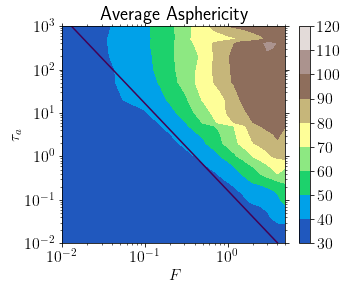

In [12]:
mpl.rcParams.update({'font.size':16, 'text.usetex':True})
# print(mpl.rcParams.keys)
fig,ax=plt.subplots(1,1,figsize=(5,4))
# ax.set_prop_cycle(cycler('color', plt.cm.RdBu))
fpath='../../data/SAC_exp/'
ind=4
colors = pl.cm.hot(np.linspace(0,1,20))

for (name,tp) in [('low',1)]:#,('mid',1.0), ('high',100)]:
    rgs=[]
    Fs=[]
    Tas=[]
    rg_eq=0
    count=0
    ax.clear()
    for fname in os.listdir(fpath+'Shape/'):
        if 'shape_descriptors' in fname and '.npz' in fname:
            T= float(fname.split('_')[ind].replace('T',''))
            F=float(fname.split('_')[ind+1].replace('F',''))
            Ta=float(fname.split('_')[ind+2].replace('Ta',''))
            kb=float(fname.split('_')[ind+7].replace('kb',''))
            Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
            R0=float(fname.split('_')[ind+4].replace('R0',''))
            dt=float(fname.split('_')[ind+8].replace('dt',''))
            # print(T,F,Ta,Esoft,R0)

            npzfile=np.load(fpath+'Shape/'+fname)
            Fs.append(F)
            Tas.append(Ta)
            # print(npzfile.files)
            rg_avg=simps(npzfile['asph'][0]*npzfile['asph'][1], npzfile['asph'][1])
            
            rgs.append(rg_avg)
            
            if F==0 and Ta==1: 
                rg_eq=rg_avg
                Fs.append(0)
                Tas.append(0.01)
                rgs.append(rg_eq)
Xp,Yp=np.meshgrid(np.logspace(-4,1,100), np.logspace(-4,4,100))
Xi,Yi=np.meshgrid(np.unique(Fs),np.unique(Tas))
triang=tri.Triangulation(Fs,Tas)
interpZ=tri.LinearTriInterpolator(triang,np.array(rgs))
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi, levels=np.arange(30,130,10),cmap='terrain')
plt.colorbar()
# plt.contour(Xi, Yi, Zi, levels=[rg_eq],)

plt.contour(Xp, Yp, Xp**2*Yp/(0.1*200*0.0083), levels=[1.])
# plt.plot(Fs,Tas,'k+')
plt.loglog()
plt.xlabel('$F$')
plt.ylabel('$\\tau_a$')
plt.xlim(0.01,5)
plt.ylim(1e-2,1e3)
plt.title('Average Asphericity')
plt.savefig(fpath+'/plots/avg_asphericity.png', dpi=300, bbox_inches='tight')